In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os # used in case when we have to some modifications or changes in any if the files or directory.

In [7]:
files = [file for file in os.listdir(r'C:\Users\sid80\OneDrive\Desktop\DA Projects\sales data\Sales_Data-20230504T175126Z-001\Sales_Data')]
for file in files:
    print(file)
# r is basically used to convert the normal strings into the raw strings.

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
path = r'C:\Users\sid80\OneDrive\Desktop\DA Projects\sales data\Sales_Data-20230504T175126Z-001\Sales_Data'
all_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path + "/"+file)
    all_data = pd.concat([all_data,current_data])
    # above statement is used to concatenate the all other csv files into one
    
all_data.shape    

(186850, 6)

In [11]:
all_data.to_csv(r'C:\Users\sid80\OneDrive\Desktop\DA Projects\sales data\Sales_Data-20230504T175126Z-001\Sales_Data/all_data.csv',index=False)

In [12]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

In [13]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [15]:
all_data = all_data.dropna()

In [17]:
all_data.shape

(186305, 6)

In [18]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### What is the best month for sale?

In [19]:
'04/19/19 08:46'.split('/')[0]

'04'

In [20]:
def month(x):
    return x.split('/')[0]

In [21]:
# adding the month column in the dataframe 
all_data['month'] = all_data['Order Date'].apply(month)

In [23]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [26]:
all_data['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [28]:
filter=all_data['month']=='Order Date'
len(all_data[~filter])

185950

In [29]:
all_data=all_data[~filter]

In [30]:
all_data.shape

(185950, 7)

In [31]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

In [32]:
all_data['month']=all_data['month'].astype(int)

C:\Users\sid80\AppData\Local\Temp\ipykernel_11552\3531618766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month']=all_data['month'].astype(int)


In [33]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [34]:
all_data['Price Each']=all_data['Price Each'].astype(float)

C:\Users\sid80\AppData\Local\Temp\ipykernel_11552\470388495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)


In [35]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

C:\Users\sid80\AppData\Local\Temp\ipykernel_11552\1596566597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


In [36]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

C:\Users\sid80\AppData\Local\Temp\ipykernel_11552\3816872270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']


Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month   sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

In [38]:
all_data.groupby('month')['sales'].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

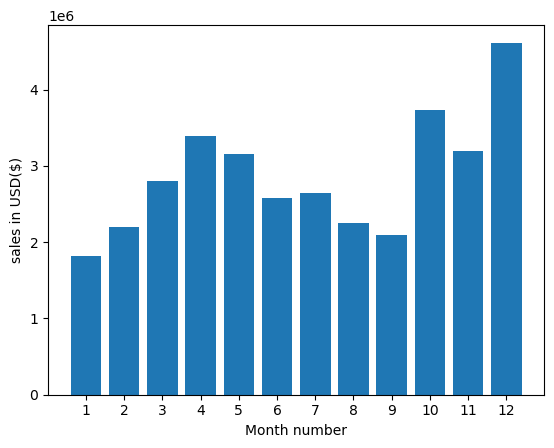

In [39]:
months = range(1,13)
plt.bar(months,all_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.ylabel('sales in USD($)')
plt.xlabel('Month number')
plt.show()

### Which city have maximum numbers of orders?

In [40]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month   sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

In [41]:
def city(x):
    return x.split(',')[1]

In [42]:
all_data['city'] = all_data['Purchase Address'].apply(city)

In [43]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

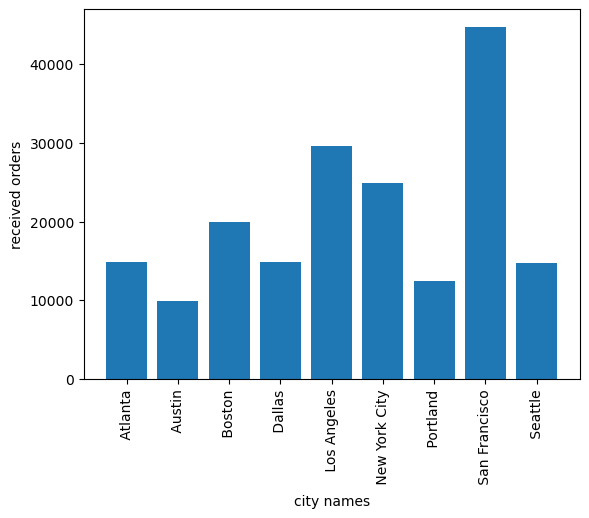

In [44]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

### What time should we display advertisements to maximise for product purchase?

In [45]:
all_data['Order Date'][0].dtype

dtype('O')

In [46]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [47]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

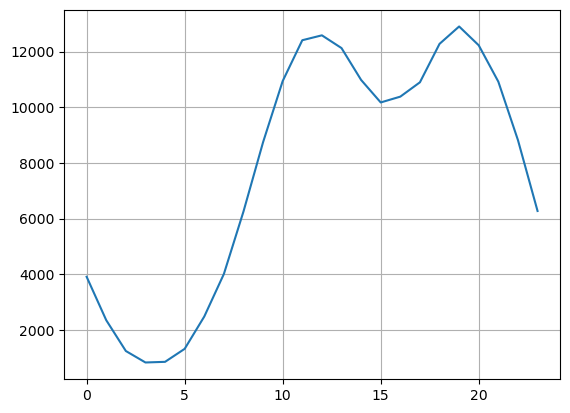

In [48]:
plt.grid()
plt.plot(keys,hour)

### Most sold product and why?

<AxesSubplot:xlabel='Product'>

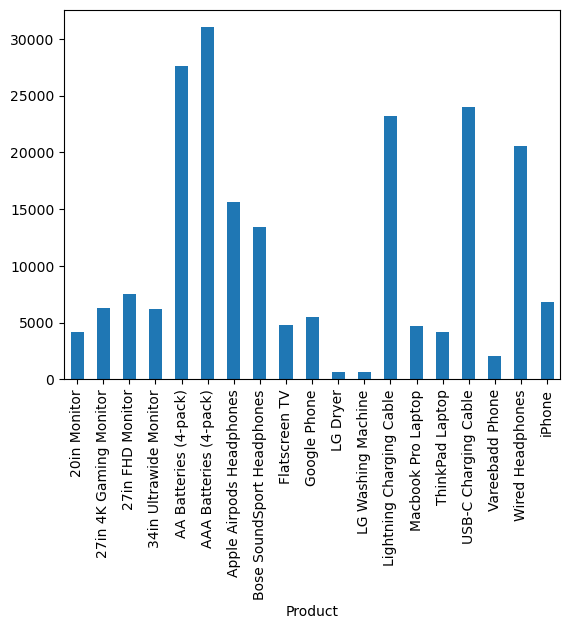

In [49]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind= 'bar')

In [50]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [51]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\sid80\AppData\Local\Temp\ipykernel_11552\2263540929.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

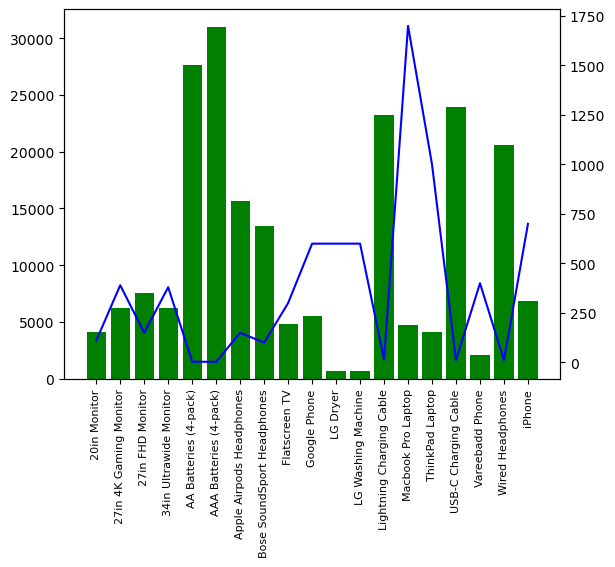

In [52]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

In [53]:
# The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product.
# The cheaper the product higher the quantity ordered and vice versa.

## keep orders that have same order Id,are sold mostly together

In [54]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

Order ID                     Product  Quantity Ordered  Price Each  \
3     176560                Google Phone                 1      600.00   
4     176560            Wired Headphones                 1       11.99   
18    176574                Google Phone                 1      600.00   
19    176574        USB-C Charging Cable                 1       11.95   
30    176585  Bose SoundSport Headphones                 1       99.99   
31    176585  Bose SoundSport Headphones                 1       99.99   
32    176586      AAA Batteries (4-pack)                 2        2.99   
33    176586                Google Phone                 1      600.00   
119   176672    Lightning Charging Cable                 1       14.95   
120   176672        USB-C Charging Cable                 1       11.95   
129   176681    Apple Airpods Headphones                 1      150.00   
130   176681             ThinkPad Laptop                 1      999.99   
138   176689  Bose SoundSport Headphones                 1       99.99   
139   176689      AAA Batteries (4-pack)                 2        2.99   
189   176739      34in Ultrawide Monitor                 1      379.99   
190   176739                Google Phone                 1      600.00   
225   176774    Lightning Charging Cable                 1       14.95   
226   176774        USB-C Charging Cable                 1       11.95   
233   176781                      iPhone                 1      700.00   
234   176781    Lightning Charging Cable                 1       14.95   

         Order Date                         Purchase Address  month   sales  \
3    04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4  600.00   
4    04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   11.99   
18   04/03/19 19:42        20 Hill St, Los Angeles, CA 90001      4  600.00   
19   04/03/19 19:42        20 Hill St, Los Angeles, CA 90001      4   11.95   
30   04/07/19 11:31        823 Highland St, Boston, MA 02215      4   99.99   
31   04/07/19 11:31        823 Highland St, Boston, MA 02215      4   99.99   
32   04/10/19 17:00   365 Center St, San Francisco, CA 94016      4    5.98   
33   04/10/19 17:00   365 Center St, San Francisco, CA 94016      4  600.00   
119  04/12/19 11:07    778 Maple St, New York City, NY 10001      4   14.95   
120  04/12/19 11:07    778 Maple St, New York City, NY 10001      4   11.95   
129  04/20/19 10:39         331 Cherry St, Seattle, WA 98101      4  150.00   
130  04/20/19 10:39         331 Cherry St, Seattle, WA 98101      4  999.99   
138  04/24/19 17:15  659 Lincoln St, New York City, NY 10001      4   99.99   
139  04/24/19 17:15  659 Lincoln St, New York City, NY 10001      4    5.98   
189  04/05/19 17:38             730 6th St, Austin, TX 73301      4  379.99   
190  04/05/19 17:38             730 6th St, Austin, TX 73301      4  600.00   
225  04/25/19 15:06     372 Church St, Los Angeles, CA 90001      4   14.95   
226  04/25/19 15:06     372 Church St, Los Angeles, CA 90001      4   11.95   
233  04/03/19 07:37         976 Hickory St, Dallas, TX 75001      4  700.00   
234  04/03/19 07:37         976 Hickory St, Dallas, TX 75001      4   14.95   

               city  Hour  
3       Los Angeles    14  
4       Los Angeles    14  
18      Los Angeles    19  
19      Los Angeles    19  
30           Boston    11  
31           Boston    11  
32    San Francisco    17  
33    San Francisco    17  
119   New York City    11  
120   New York City    11  
129         Seattle    10  
130         Seattle    10  
138   New York City    17  
139   New York City    17  
189          Austin    17  
190          Austin    17  
225     Los Angeles    15  
226     Los Angeles    15  
233          Dallas     7  
234          Dallas     7

In [55]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\sid80\AppData\Local\Temp\ipykernel_11552\4182328167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [56]:
df.head()

Order ID                     Product  Quantity Ordered  Price Each  \
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
18   176574                Google Phone                 1      600.00   
19   176574        USB-C Charging Cable                 1       11.95   
30   176585  Bose SoundSport Headphones                 1       99.99   

        Order Date                      Purchase Address  month   sales  \
3   04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4   04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
18  04/03/19 19:42     20 Hill St, Los Angeles, CA 90001      4  600.00   
19  04/03/19 19:42     20 Hill St, Los Angeles, CA 90001      4   11.95   
30  04/07/19 11:31     823 Highland St, Boston, MA 02215      4   99.99   

            city  Hour                                            Grouped  
3    Los Angeles    14                      Google Phone,Wired Headphones  
4    Los Angeles    14                      Google Phone,Wired Headphones  
18   Los Angeles    19                  Google Phone,USB-C Charging Cable  
19   Los Angeles    19                  Google Phone,USB-C Charging Cable  
30        Boston    11  Bose SoundSport Headphones,Bose SoundSport Hea...

In [58]:
df.shape

(14649, 11)

In [59]:
df2 = df.drop_duplicates(subset=['Order ID'])

<AxesSubplot:ylabel='Grouped'>

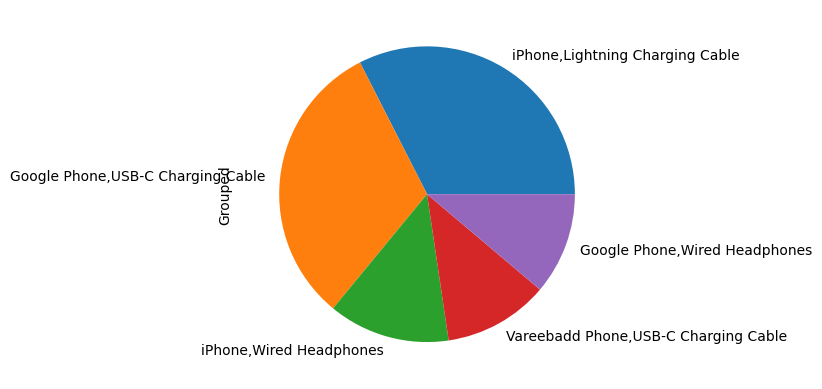

In [60]:
df2['Grouped'].value_counts()[0:5].plot.pie()